In [1]:
import pandas as pd
import numpy as np
from my_fun import summary_result
from my_fun import plot_result_mergecv
import seaborn as sns

scatter_data_ridge = pd.read_csv("result/allsubjects/out02_scatter_data_gender_ridge.csv", sep = ",", header = 0, )
scatter_data_svr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_svr.csv", sep = ",", header = 0, )
scatter_data_gpr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_gpr.csv", sep = ",", header = 0, )
scatter_data_dnn = pd.read_csv("result/allsubjects/out02_scatter_data_gender_dnn.csv", sep = ",", header = 0, )

feature_name = 'GMV&rsfMRI'
# feature_name = 'GMV&DTI'
#feature_name = 'Multi-modal'

In [2]:
def combine_scatter_data(data_list, feature = feature_name):
    out_data_list = []
    for i in range(len(data_list)):
        plot_data = data_list[i]
        plot_data = plot_data.set_index(['feature']).sort_index()
        plot_data = plot_data.loc[feature,:]
        plot_data['age gap corr'] = -plot_data['brain age fit']+plot_data['brain age']
        plot_data['age gap'] = -plot_data['chronological age']+plot_data['brain age']
        out_data_list.append(plot_data)
        
    out_data = pd.concat(out_data_list, keys = ['Ridge', 'SVR', 'GPR', 'DNN'], sort = True)
    return(out_data)


In [3]:
scatter_data_list = [scatter_data_ridge, scatter_data_svr, scatter_data_gpr, scatter_data_dnn]
scatter_data = combine_scatter_data(scatter_data_list)
# scatter_data['CV'].value_counts()

In [4]:
def plot_age_gap(plot_data, x_label = 'chronological age', y_label = 'age gap'):
    
    index_name = plot_data.index.unique(level = 0)
    plot_data = plot_data.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)
    
    g = sns.lmplot(x=x_label, y=y_label, hue = 'CV', col = 'Method', \
                       data = plot_data2, fit_reg=False, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = False, col_wrap=2)
    g.axes[0].set_xlim(6.5, 22.5)
    
    for i_index in index_name:
        # chronological age vs brain age:
        corr = np.corrcoef(plot_data.loc[(i_index), y_label].values, 
                           plot_data.loc[(i_index), x_label].values)
        label1 = "r cor = %.3f" % corr[0,1]

        
        sns.regplot(x=x_label, y=y_label, \
                    data = plot_data.loc[i_index], scatter=False, ax=g.axes[sub_plot], order = 1)

        #text_y = plot_data['age gap'].max()+.2
        g.axes[sub_plot].text(18, 5, label1, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)
    g.axes[0].set_ylabel(y_label)
    g.axes[2].set_ylabel(y_label)

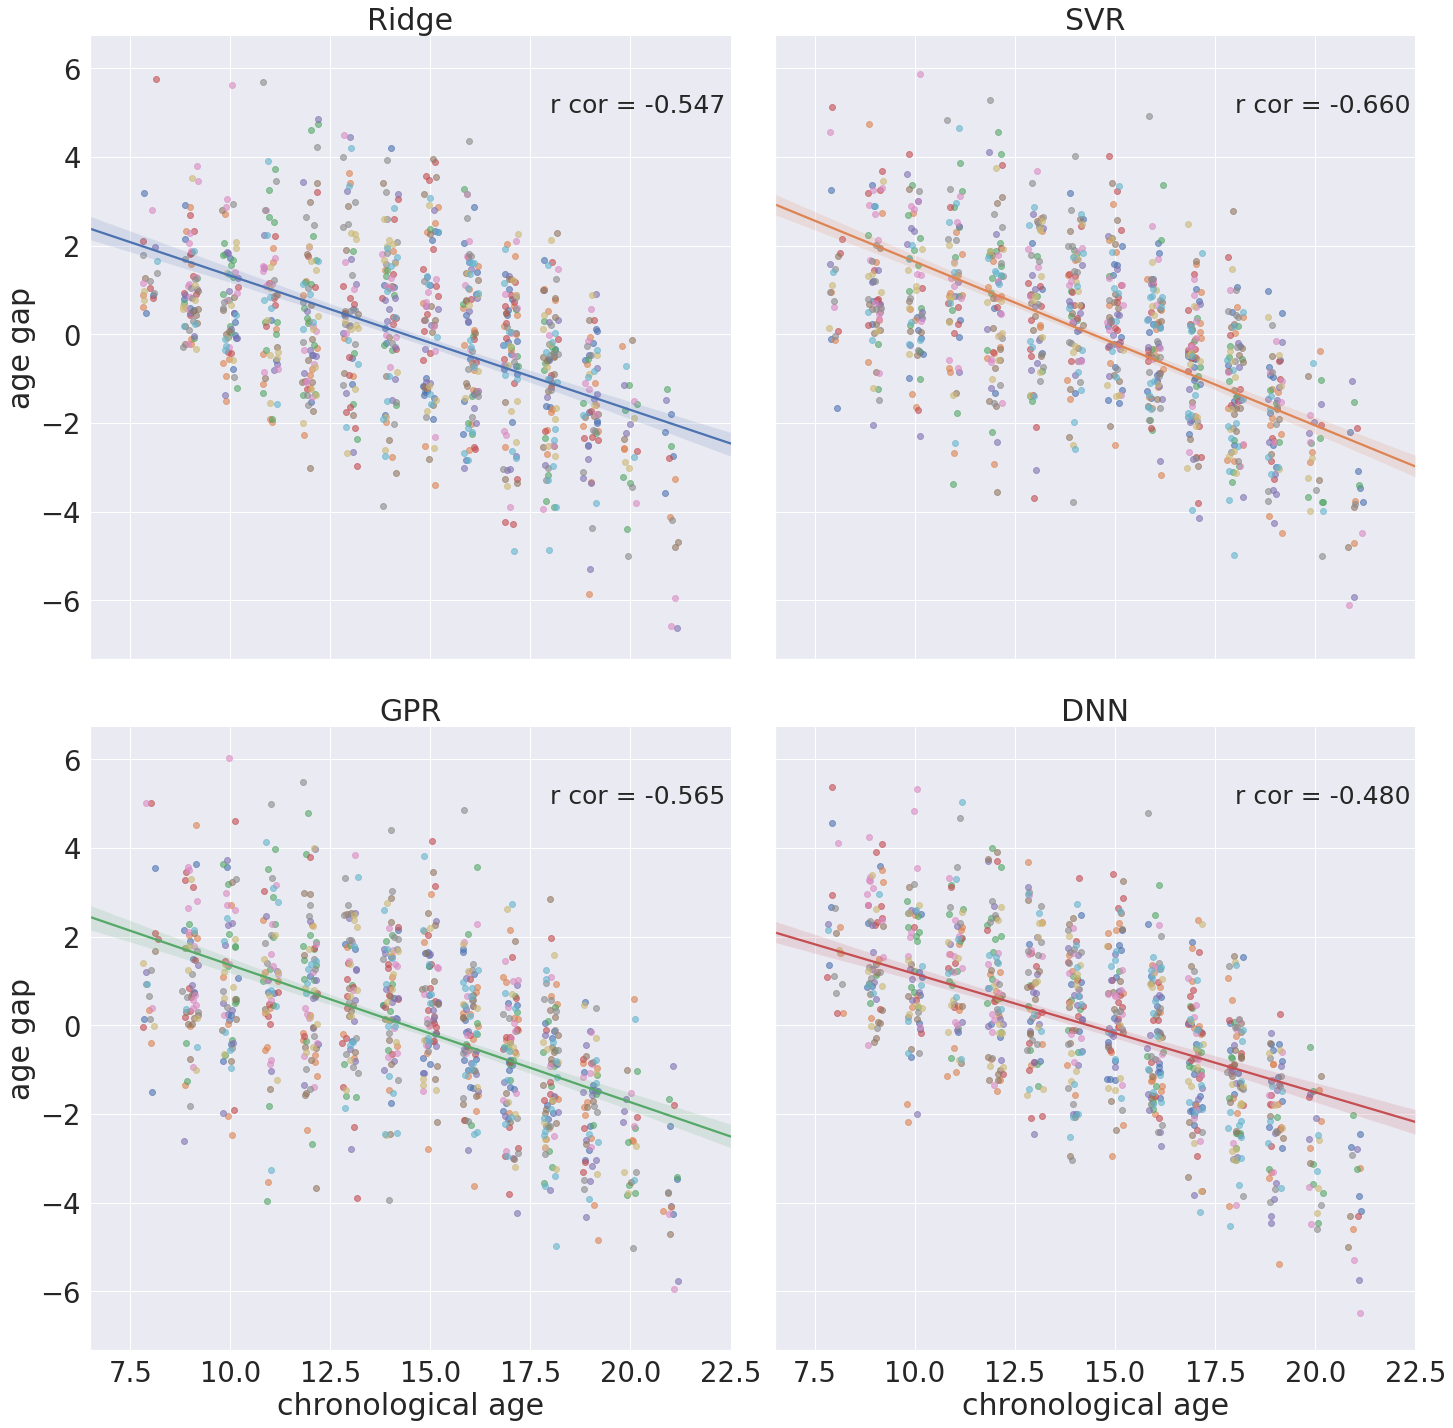

In [5]:
plot_age_gap(scatter_data)

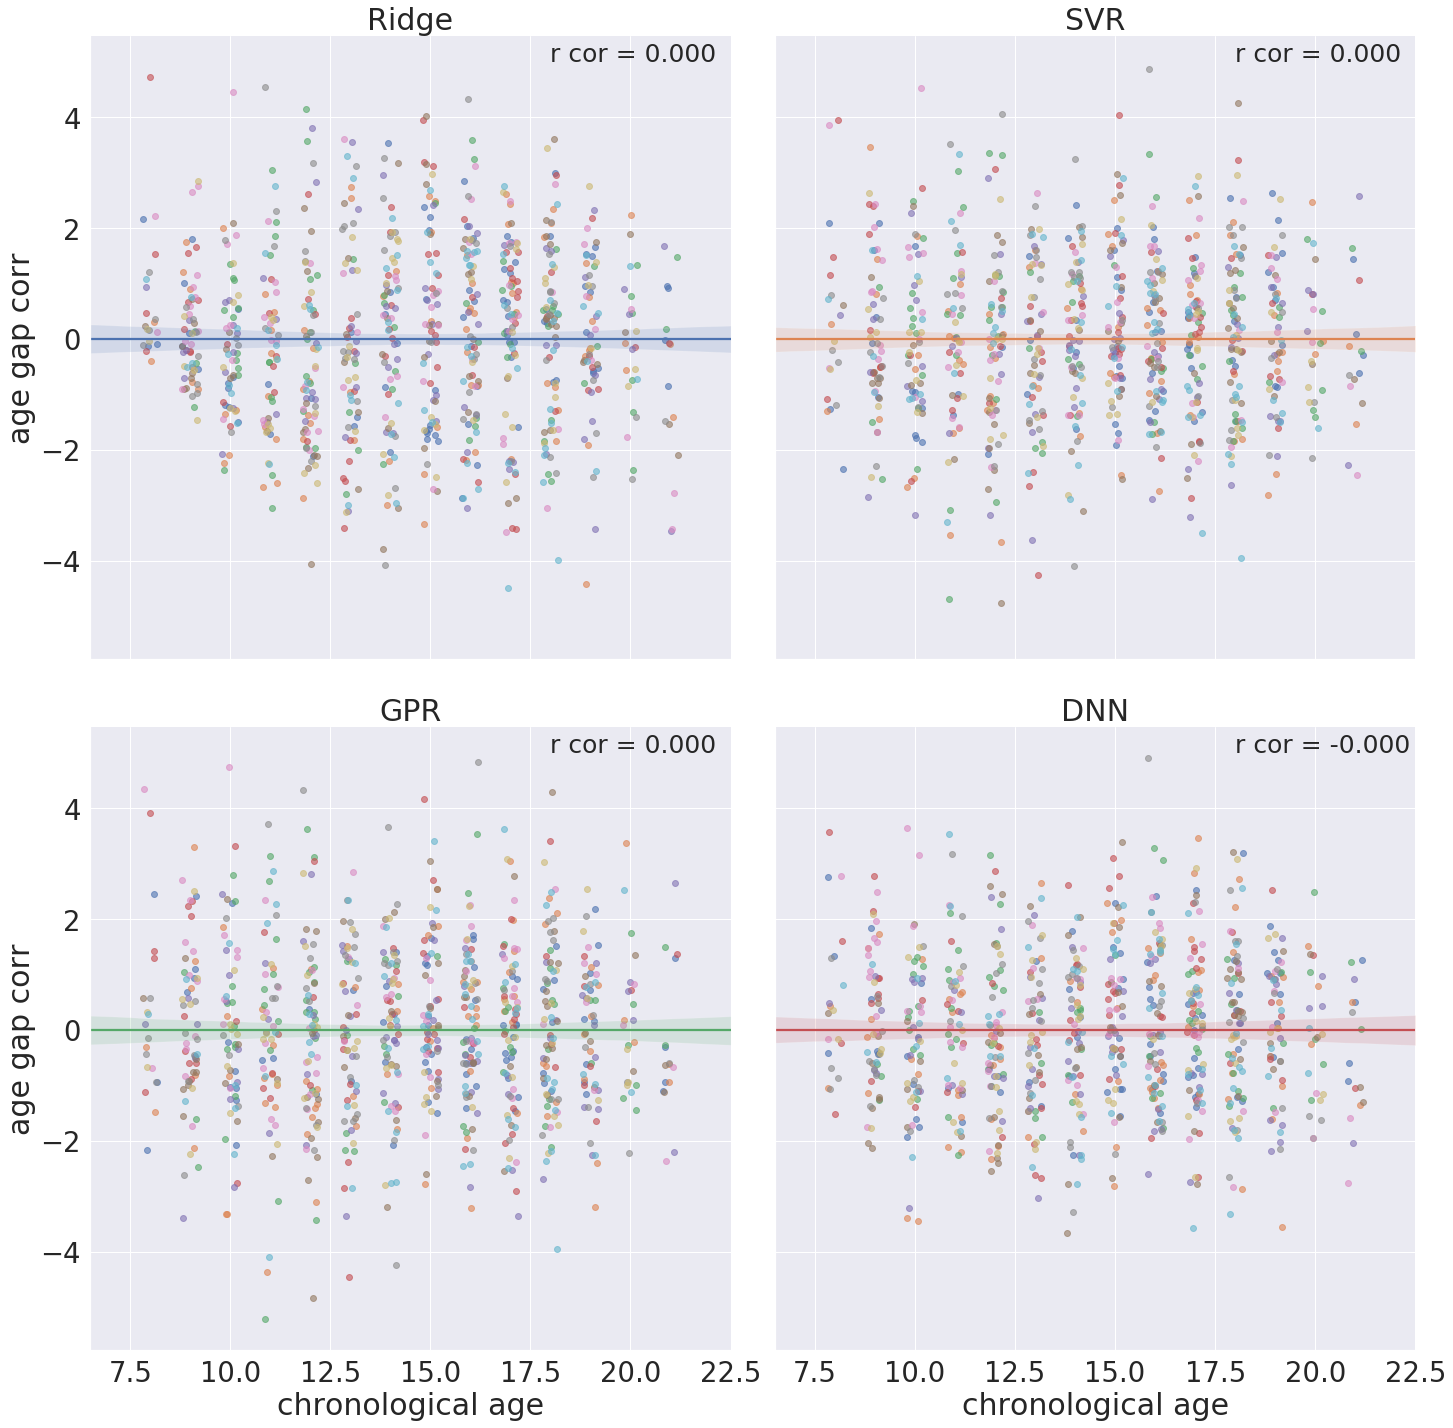

In [6]:
plot_age_gap(scatter_data, 'chronological age', 'age gap corr')

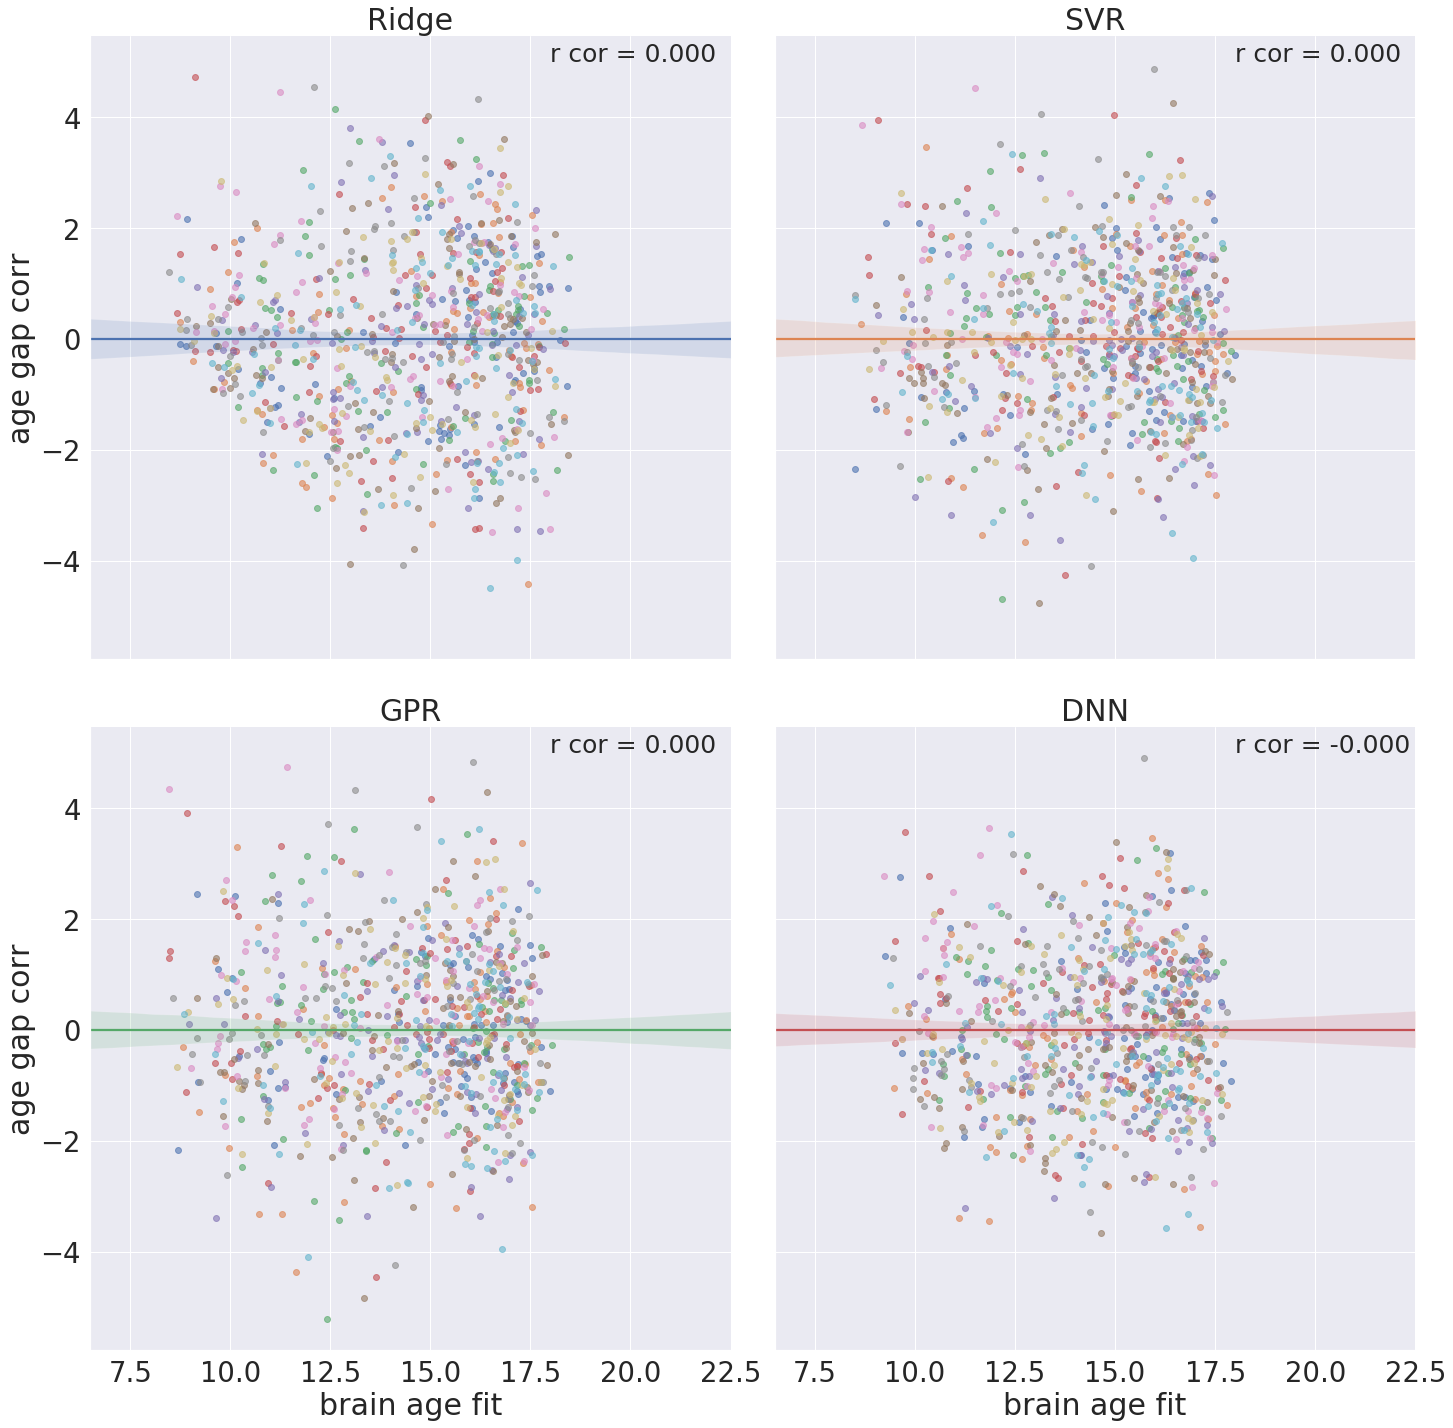

In [7]:
plot_age_gap(scatter_data, 'brain age fit', 'age gap corr')

In [8]:
from my_fun import qudratic_r_squared

def plot_result_gender(plot_data):

    index_name = plot_data.index.unique(level = 0)
    
    plot_data = plot_data.sort_index()
#     result_table_summary = result_table_summary.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)

    g = sns.lmplot(x='chronological age', y='brain age', hue = 'Sex', col = 'Method', \
                       data = plot_data2, fit_reg=True, order = 2, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = True, col_wrap=2)
    
    g.axes[0].set_xlim(6.5, 22.5)
    g.axes[0].set_ylim(5.5, 22.5)
    
    for i_index in index_name:
        plot_data_i = plot_data.loc[i_index]
        chro_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','brain age fit'].values
        chro_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','brain age fit'].values
        
        brain_age_m = plot_data_i.loc[plot_data_i['Sex']=='M','brain age'].values
        brain_age_f = plot_data_i.loc[plot_data_i['Sex']=='F','brain age'].values
        
        
        # chronological age vs age gap:
        label2 = "Male: $R^2$ cor = %.3f, MAE cor = %.3f" % \
        (qudratic_r_squared(chro_age_m, brain_age_m),\
         np.mean(np.abs(chro_age_m - brain_age_m)))
        
        label1 = "Female: $R^2$ cor = %.3f, MAE cor = %.3f" % \
        (qudratic_r_squared(chro_age_f, brain_age_f),\
         np.mean(np.abs(chro_age_f - brain_age_f)))


        #text_y = plot_data['brain age'].max()+.2
        g.axes[sub_plot].text(8, 20.5, label1, fontsize = 25)
        g.axes[sub_plot].text(8, 21.4, label2, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

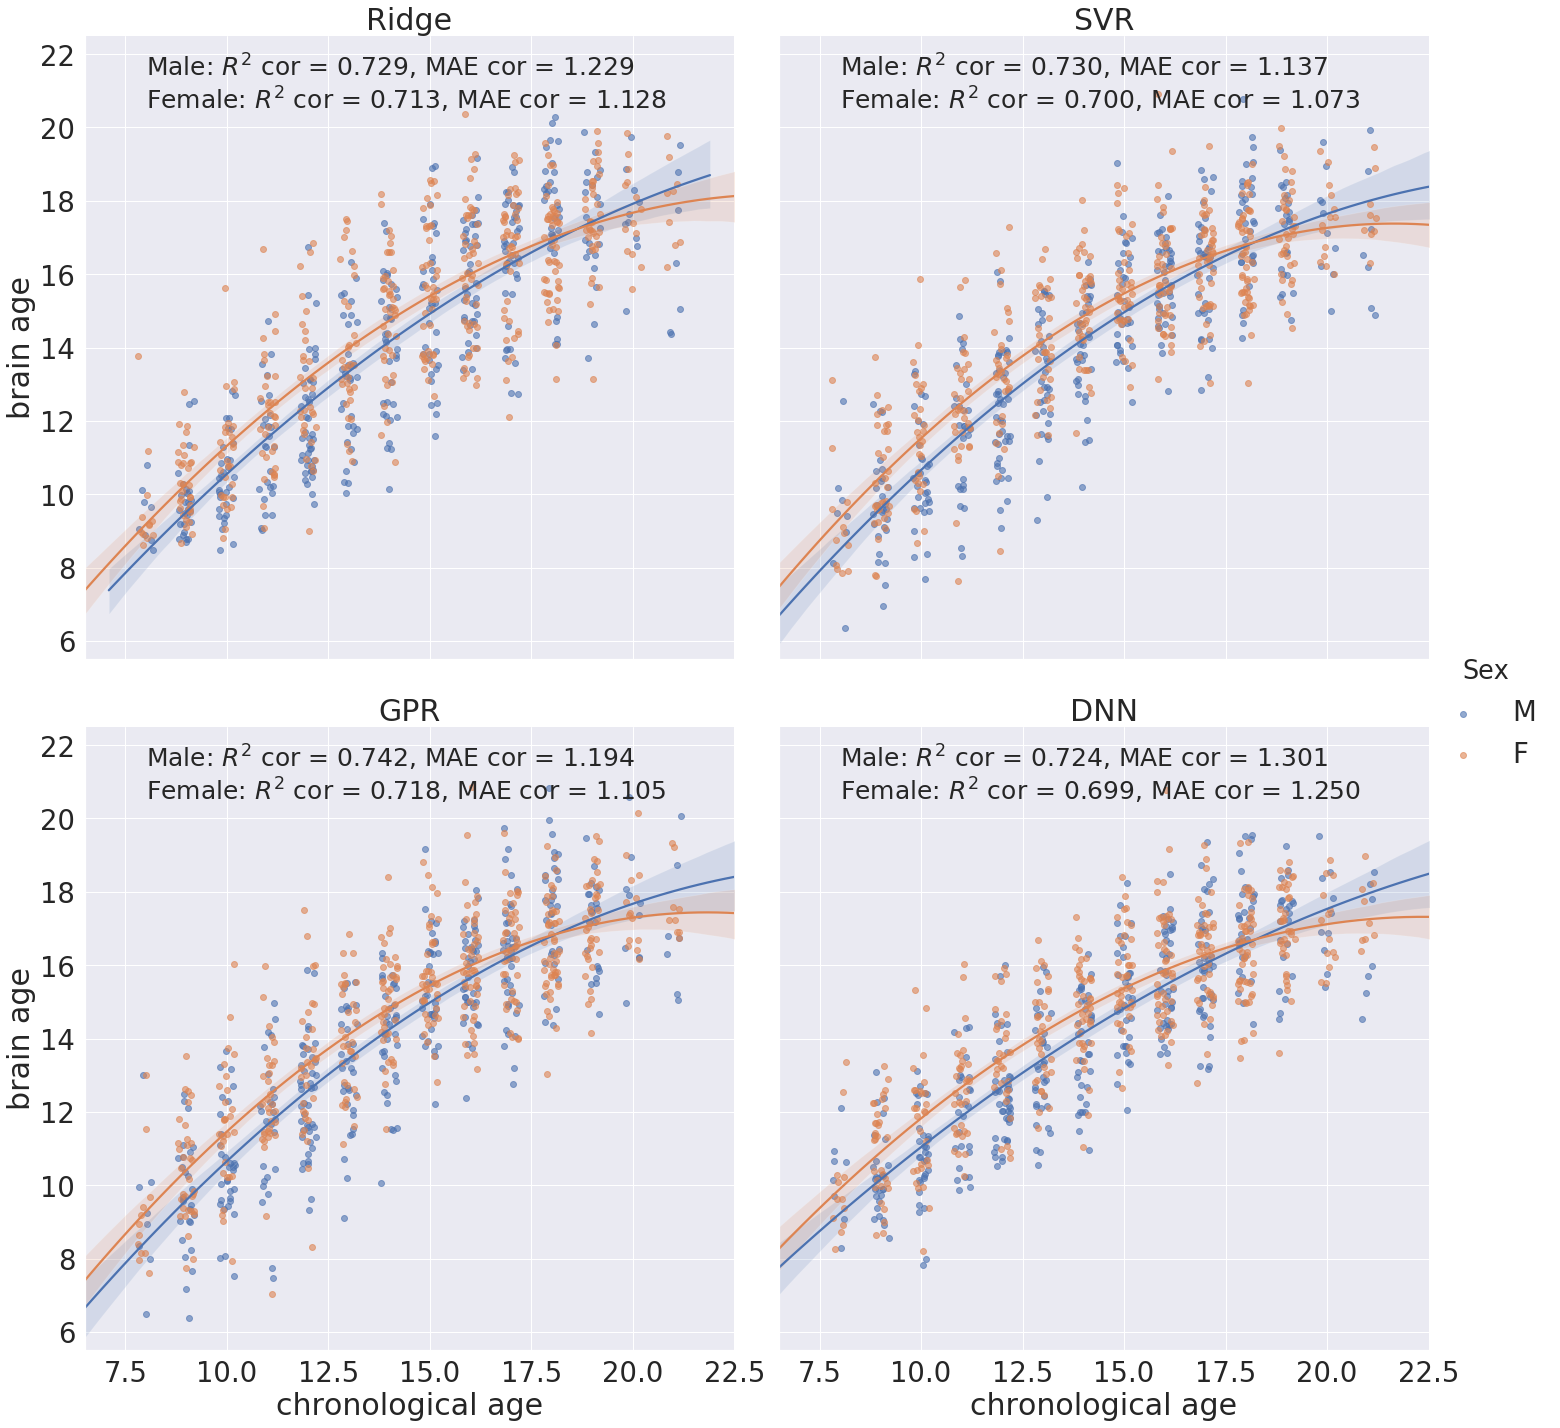

In [9]:
plot_result_gender(scatter_data)

In [10]:
def plot_age_gap_gender(plot_data, x_label = 'chronological age', y_label = 'age gap corr'):

    index_name = plot_data.index.unique(level = 0)
    
    plot_data = plot_data.sort_index()
    
    plot_data2 = plot_data.reset_index()
    plot_data2.rename(columns = {'level_0':'Method'}, inplace = True)
    
    sub_plot = 0
    sns.set(rc={'figure.figsize':(15,15)}, font_scale = 2.5)

    g = sns.lmplot(x=x_label, y=y_label, hue = 'Sex', col = 'Method', \
                       data = plot_data2, fit_reg=True, order = 1, sharex = True, sharey = True,\
                       scatter_kws={'alpha':0.6}, x_jitter = .2,\
                       height=10.27, aspect=10.27/10.27, legend = True, col_wrap=2)
    
    g.axes[0].set_ylabel('age gap cor')
    g.axes[2].set_ylabel('age gap cor')
    g.axes[0].set_xlim(6.5, 22.5)
    g.axes[0].set_ylim(-6.5, 6.5)
    
    for i_index in index_name:
        plot_data_i = plot_data.loc[i_index]

        x_male = plot_data_i.loc[plot_data_i['Sex']=='M', x_label].values
        x_female = plot_data_i.loc[plot_data_i['Sex']=='F', x_label].values
        
        y_male = plot_data_i.loc[plot_data_i['Sex']=='M', y_label].values
        y_female = plot_data_i.loc[plot_data_i['Sex']=='F', y_label].values

        corr_m = np.corrcoef(x_male, y_male)[0,1]
        corr_f = np.corrcoef(x_female, y_female)[0,1]
        
        # chronological age vs brain age:
        label2 = "Male: r cor = %.3f" % corr_m
        label1 = "Female: r cor = %.3f" % corr_f


        #text_y = plot_data['brain age'].max()+.2
        g.axes[sub_plot].text(16, 5, label1, fontsize = 25)
        g.axes[sub_plot].text(16, 5.5, label2, fontsize = 25)
        
        g.axes[sub_plot].set_title(i_index)
        if sub_plot<2:
            g.axes[sub_plot].set_xlabel('')
        if sub_plot%2 == 1:
            g.axes[sub_plot].set_ylabel('')
        sub_plot = sub_plot + 1
        
        #g.axes[0, 0].set_ylim(8, 23)

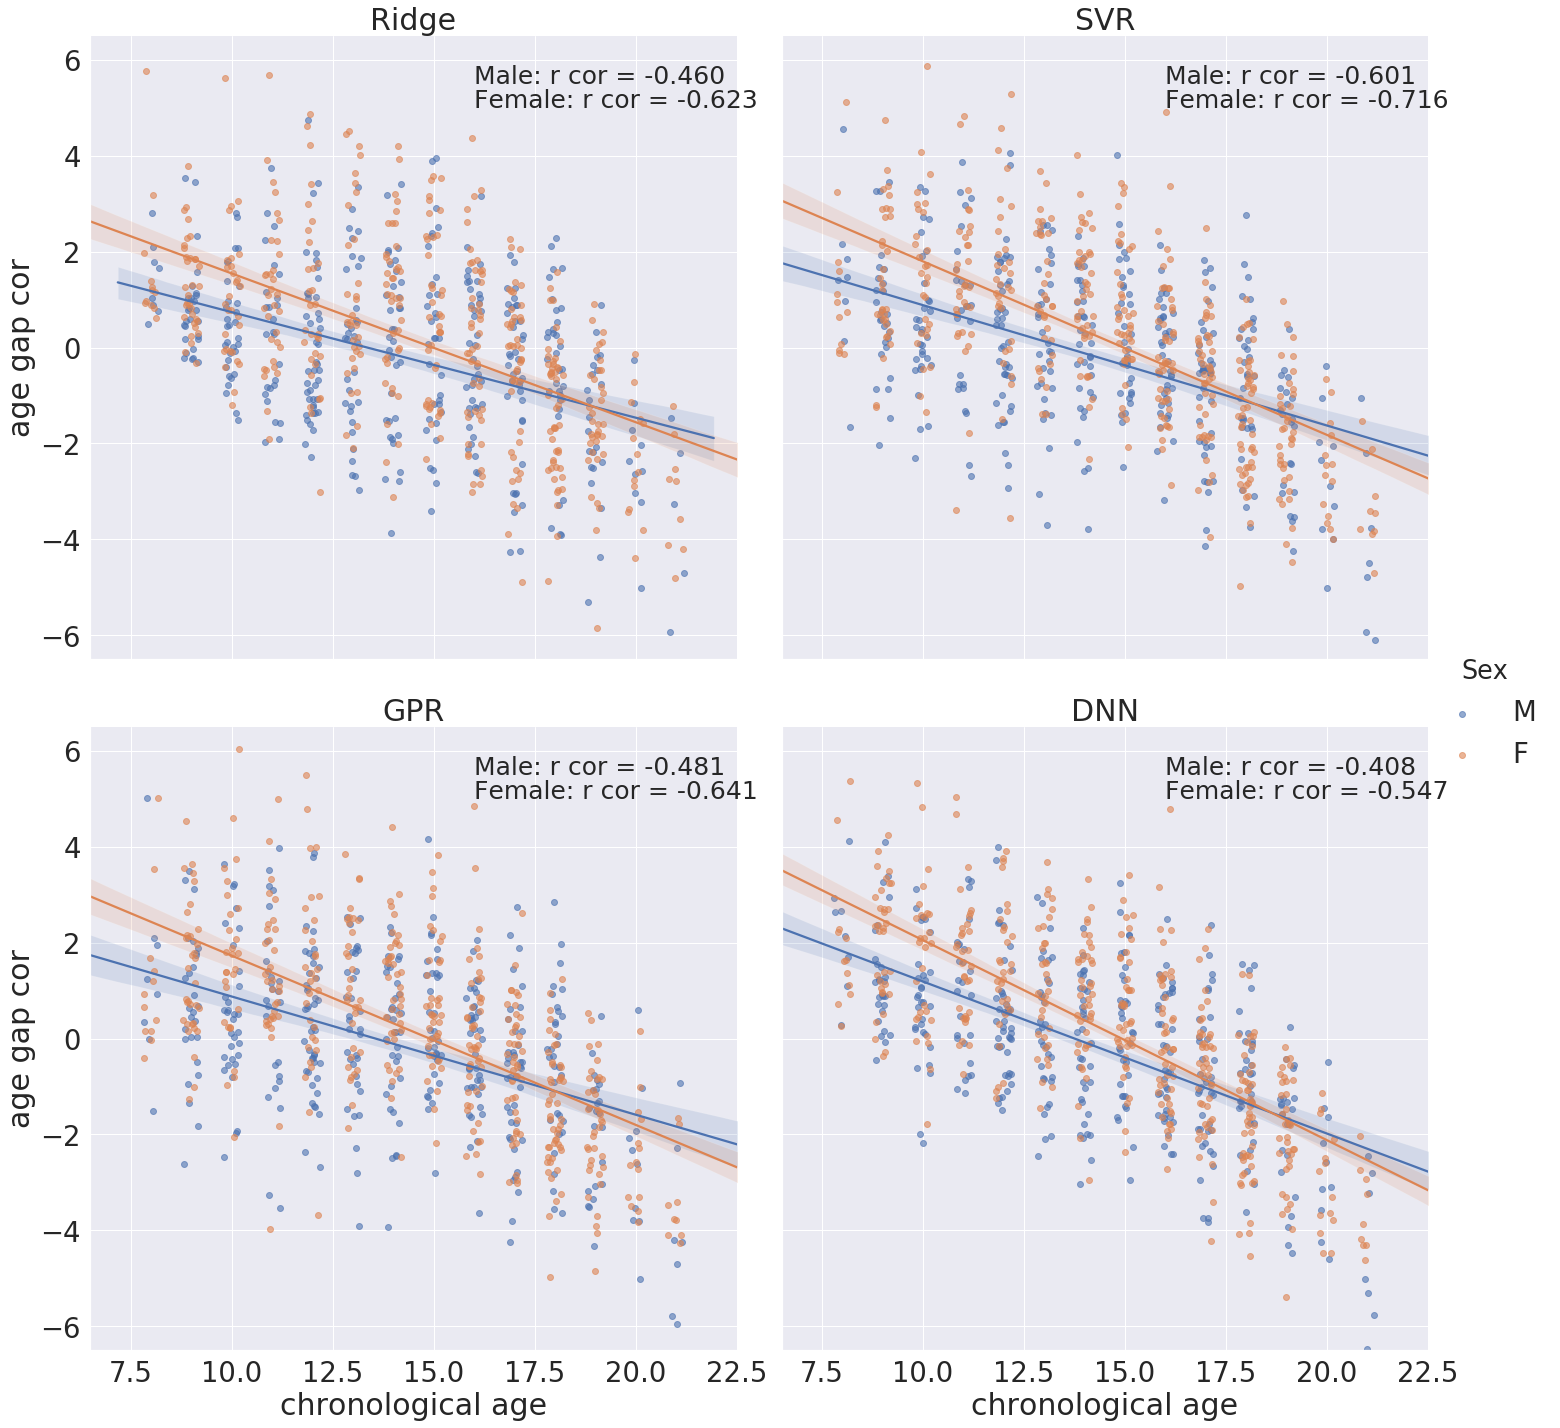

In [11]:
plot_age_gap_gender(scatter_data, 'chronological age', 'age gap')

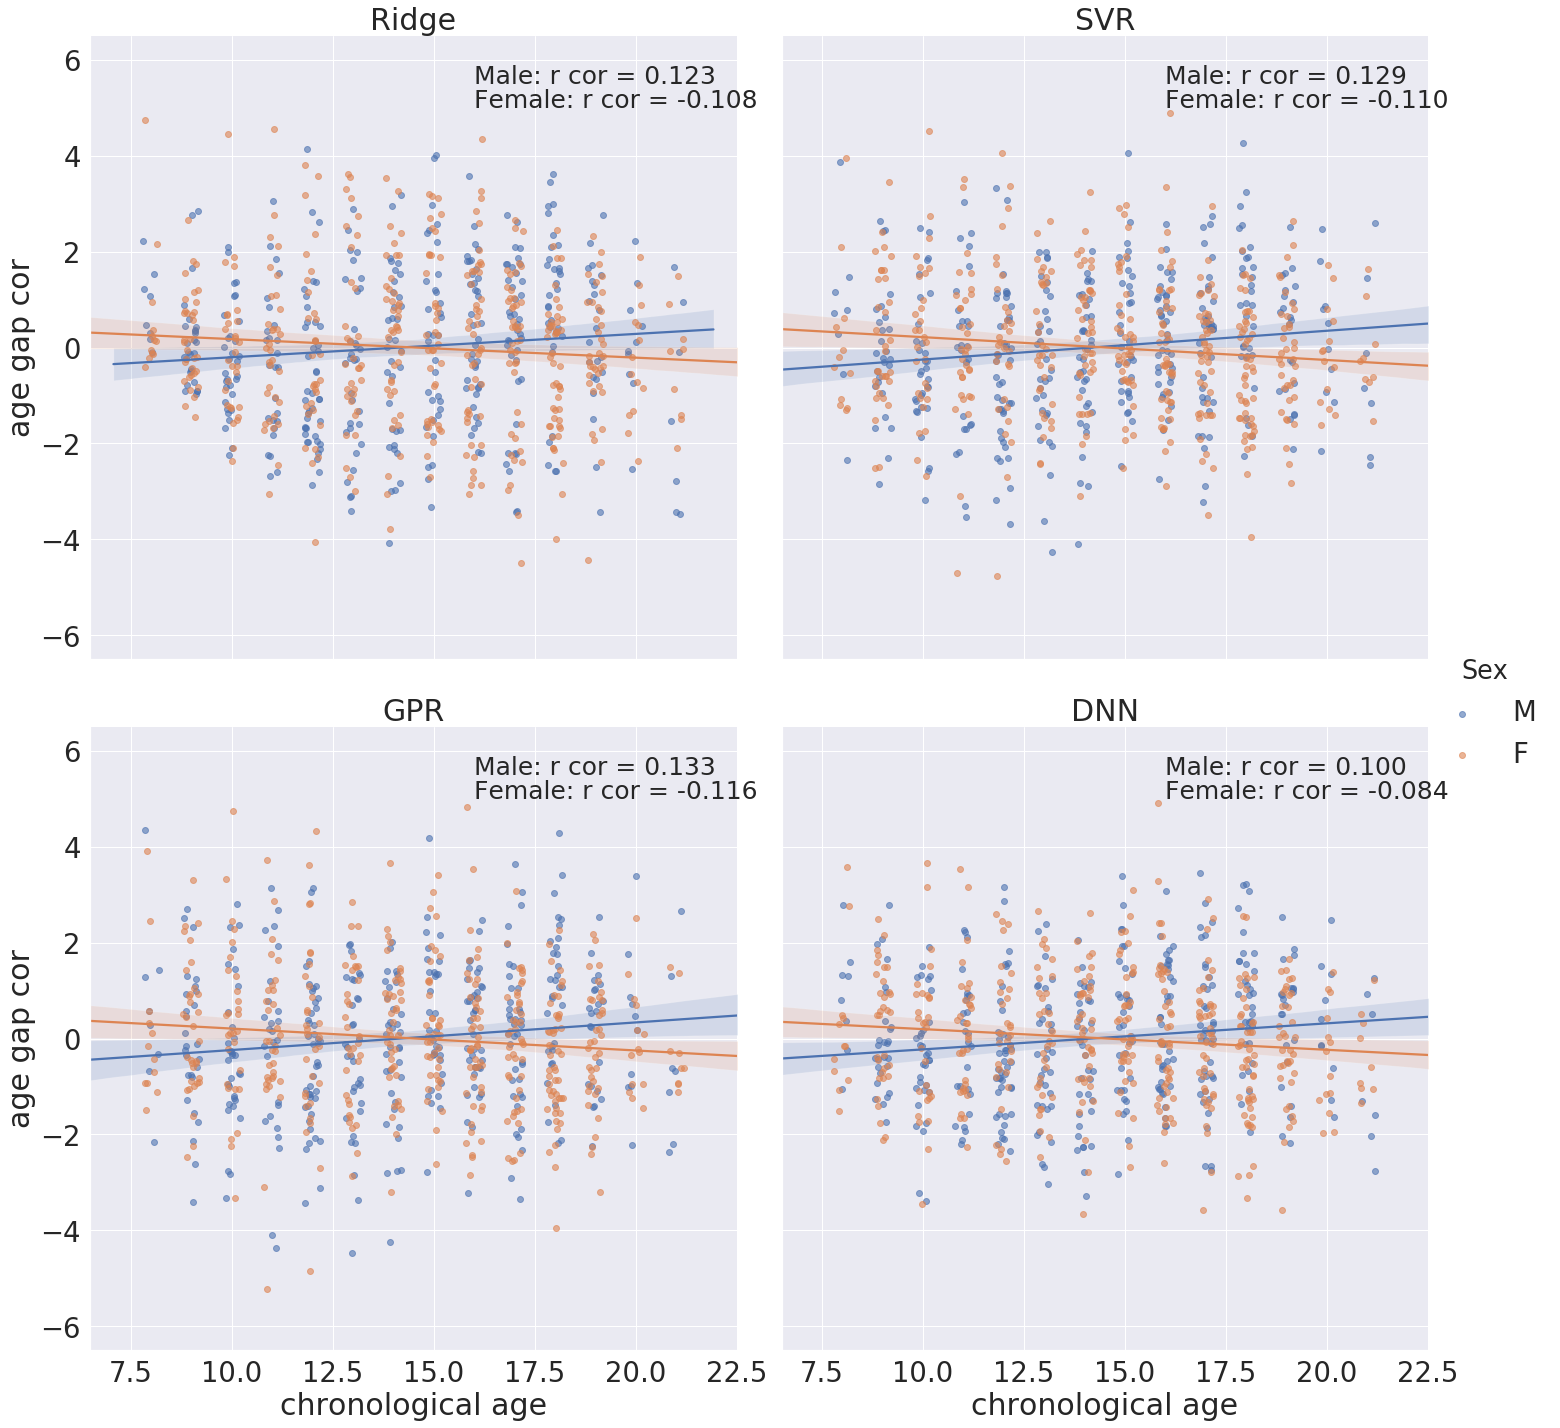

In [12]:
plot_age_gap_gender(scatter_data)